### Robot Learning

### Assignment 1

Solutions are due on 18.04.2023 before the lecture.

## Task 1.1)

In the game of Tic-Tac-Toe, two players alternate placing crosses and circles on a $3 \times 3$ grid, until one player has a row, column, or diagonal of three own pieces, which is a win.

<center><img src="helpers/tictactoe.png" width="240" height="240"/></center>

In the following tasks, the game state will be encoded by denoting the symbol $X$ by the digit $2$, the symbol $O$ by the digit $0$ and the blank field by the digit $1$. The board is then viewed as a $3 \times 3$ matrix and flattened to a vector with $9$ entries. The entries of this vector are regarded as the digits of base 3 number and finally converted to base 10. Using this number, a table of state values V(s) can be maintained. For example:

$s_{3 \times 3} = \begin{vmatrix}
O &  & O \\
O & X &  \\
X & X & X\\
\end{vmatrix} \leftrightarrow \begin{bmatrix}
0 & 1 & 0 \\
0 & 2 & 1\\
2 & 2 & 2\\
\end{bmatrix} \leftrightarrow 010021222_3 \leftrightarrow 2402_{10} =: E(s_{3 \times 3}) =: s$

Describe an inverse of this map and illustrate the individual steps in a different example leading to a legal board state!

<div style="text-align: right; font-weight:bold"> 4 Points </div>

Please answer in this text cell.

## Task 1.2)

Closely examine the script below, in which two random agents face off in a game of Tic-Tac-Toe. 

Create a suitable structure for state values from the perspective of an agent playing crosses and initialize it for all states with $V(s)=0$. Extend the script below to play $num\_episodes=10000$ matches and set $V(s)=1$ when there is a win or $V(s)=0$ when there is a loss or the game ends in a draw, i.e. no further pieces can be placed.

At the end of each game, go through all states that your agent visited in reverse order and set

$V(s) \leftarrow V(s) + 0.1 [ V(s’) - V(s) ]$, where $s’$ is the successor state.

Document $V(s)$ for all nine states where the agent playing crosses can place their first piece!

<div style="text-align: right; font-weight:bold"> 6 Points </div>

In [42]:
import matplotlib.pyplot as plt
# get the required helper class and visualization function
import numpy as np
from helpers.utils import env, draw_trajectory

# this makes sure that all experiments can be reproduced
np.random.seed(321)

# create a game environment
tictactoe = env()

states_dict = dict()

# simulate 3 episodes
for _ in range(10000):
    # reset the game to the empty board - do this before each new episode
    tictactoe.reset()

    # create a flag which tracks whether the game is over
    done = False

    # create list to save the trajectory of the agent, start with empty board
    states = [np.ones((1,3,3),dtype = int)]

    states_id_seq = []

    # simulate until the episode is over
    while not done:
        # which actions are possible for 'X' at the current state?
        # what are the indices of the states arising from these actions?
        next_state_indices, possible_actions = tictactoe.get_available_actions()
        # select one of the actions randomly
        a_x = tuple(possible_actions[np.random.choice(possible_actions.shape[0])])
        # execute the action using the step function, observe next state and reward
        # the reward r is 1 when 'X' wins and 0 otherwise
        s_matrix, r, done = tictactoe.step(a=a_x)
        # save the state in 3x3 matrix form
        states.append(s_matrix)
        # HINT: call tictactoe.state_to_ind(s_matrix) to encode the state
        # we don't need to simulate for 'O' if the game is already over

        states_id_seq.append(str(tictactoe.state_to_ind(s_matrix)[0]))

        if done:
            break
        # simulate the random action of the 'O' player in the same manner
        _, possible_actions = tictactoe.get_available_actions(p=0)
        a_o = tuple(possible_actions[np.random.choice(possible_actions.shape[0])])
        s_matrix, r, done = tictactoe.step(a=a_o, player=0)
        states.append(s_matrix)

        states_id_seq.append(str(tictactoe.state_to_ind(s_matrix)[0]))

    if states_id_seq[-1] not in states_dict:
        states_dict[states_id_seq[-1]] = r

    for i, state_id in enumerate(states_id_seq[-2::-1]):
        next_state = states_id_seq[-1-i]

        if state_id not in states_dict:
            states_dict[state_id] = 0

        states_dict[state_id] = states_dict[state_id] + 0.1 * (states_dict[next_state] - states_dict[state_id])

# generate all 3x3 possible matrices with one '1' and 8 '0'
states = np.ones((9, 9), dtype=int)
starting_states = []
for i in range(9):
    states[i, i] = 2
    starting_states.append(states[i].reshape((3, 3)))

for state in starting_states:
    print(f'result for starting state id {tictactoe.state_to_ind(state)[0]}\n'
          f'{state}')
    print(states_dict[str(tictactoe.state_to_ind(state)[0])])

result for starting state id 16402
[[2 1 1]
 [1 1 1]
 [1 1 1]]
0.07362255557439663
result for starting state id 12028
[[1 2 1]
 [1 1 1]
 [1 1 1]]
0.06287502569408332
result for starting state id 10570
[[1 1 2]
 [1 1 1]
 [1 1 1]]
0.10230327511867184
result for starting state id 10084
[[1 1 1]
 [2 1 1]
 [1 1 1]]
0.06103009849144199
result for starting state id 9922
[[1 1 1]
 [1 2 1]
 [1 1 1]]
0.11456072576090198
result for starting state id 9868
[[1 1 1]
 [1 1 2]
 [1 1 1]]
0.047376616509363784
result for starting state id 9850
[[1 1 1]
 [1 1 1]
 [2 1 1]]
0.10119095097659653
result for starting state id 9844
[[1 1 1]
 [1 1 1]
 [1 2 1]]
0.09057367625518106
result for starting state id 9842
[[1 1 1]
 [1 1 1]
 [1 1 2]]
0.08725501008721238


Conclusion: The agent playing crosses is more likely to win if it starts in the middle of the board, or in the corners.

## Task 1.3)

Replace your agent's arbitrary action selection by an epsilon-greedy strategy that with probability $0.95$ places your piece such that $V(s)$ is maximized (break ties randomly) and with probability $0.05$ places your piece uniformly among the empty fields.

Play $100000$ automated games. For every $1000$ games compute the fraction of games that your player won and document this learning curve!

Again document $V(s)$ for all nine states where you can place your first piece!

<div style="text-align: right; font-weight:bold"> 6 Points </div>

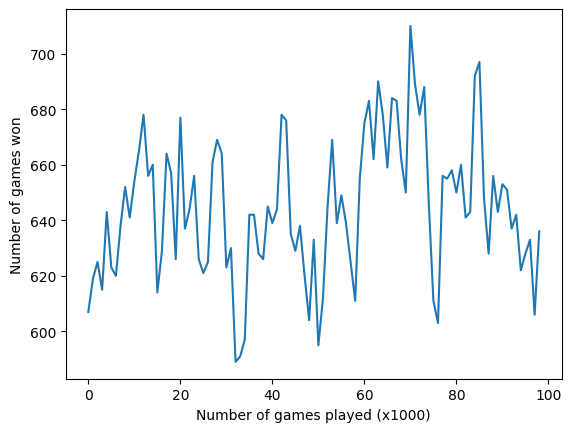

result for starting state id 16402
[[2 1 1]
 [1 1 1]
 [1 1 1]]
0.05625080122288508
result for starting state id 12028
[[1 2 1]
 [1 1 1]
 [1 1 1]]
0.1599793623315637
result for starting state id 10570
[[1 1 2]
 [1 1 1]
 [1 1 1]]
0.06753930120880616
result for starting state id 10084
[[1 1 1]
 [2 1 1]
 [1 1 1]]
0.011656772110447407
result for starting state id 9922
[[1 1 1]
 [1 2 1]
 [1 1 1]]
0.23631306670350471
result for starting state id 9868
[[1 1 1]
 [1 1 2]
 [1 1 1]]
0.03886823085142538
result for starting state id 9850
[[1 1 1]
 [1 1 1]
 [2 1 1]]
0.08277785242583865
result for starting state id 9844
[[1 1 1]
 [1 1 1]
 [1 2 1]]
0.0705161658986255
result for starting state id 9842
[[1 1 1]
 [1 1 1]
 [1 1 2]]
0.1060405587259858


In [1]:
# Your code goes here

# get the required helper class and visualization function
import numpy as np
from helpers.utils import env, draw_trajectory
import matplotlib.pyplot as plt

# this makes sure that all experiments can be reproduced
# np.random.seed(321)

# create a game environment
tictactoe = env()

states_dict = dict()

games_won = 0
games_won_list = []
for k in range(100000):

    # reset the game to the empty board - do this before each new episode
    tictactoe.reset()

    # create a flag which tracks whether the game is over
    done = False

    # create list to save the trajectory of the agent, start with empty board
    states = [np.ones((1,3,3),dtype = int)]

    states_id_seq = []

    # simulate until the episode is over
    while not done:
        # which actions are possible for 'X' at the current state?
        # what are the indices of the states arising from these actions?
        next_state_indices, possible_actions = tictactoe.get_available_actions()

        # select one of the actions based on epsilon greedy
        if np.random.rand() < 0.05:
            a_x = tuple(possible_actions[np.random.choice(possible_actions.shape[0])])
        else:
        # print('possible actions')
        # print(next_state_indices)
        # print(possible_actions)
            action_values = []
            for state_id in next_state_indices:
                if str(state_id) not in states_dict:
                    states_dict[str(state_id)] = 0
                action_values.append(states_dict[str(state_id)])
            a_x = tuple(possible_actions[np.random.choice(np.where(action_values == np.max(action_values))[0])])

        # execute the action using the step function, observe next state and reward
        # the reward r is 1 when 'X' wins and 0 otherwise
        s_matrix, r, done = tictactoe.step(a=a_x)
        # save the state in 3x3 matrix form
        states.append(s_matrix)
        # HINT: call tictactoe.state_to_ind(s_matrix) to encode the state
        # we don't need to simulate for 'O' if the game is already over

        states_id_seq.append(str(tictactoe.state_to_ind(s_matrix)[0]))

        if done:
            break
        # simulate the random action of the 'O' player in the same manner
        _, possible_actions = tictactoe.get_available_actions(p=0)
        a_o = tuple(possible_actions[np.random.choice(possible_actions.shape[0])])
        s_matrix, r, done = tictactoe.step(a=a_o, player=0)
        states.append(s_matrix)

        states_id_seq.append(str(tictactoe.state_to_ind(s_matrix)[0]))

    if states_id_seq[-1] not in states_dict:
        states_dict[states_id_seq[-1]] = r

    for i, state_id in enumerate(states_id_seq[-2::-1]):
        next_state = states_id_seq[-1-i]

        if state_id not in states_dict:
            states_dict[state_id] = 0

        states_dict[state_id] = states_dict[state_id] + 0.1 * (states_dict[next_state] - states_dict[state_id])

    if r == 1:
        games_won += 1

    # print % of games won every 1000 games
    if k and k % 1000 == 0:
        games_won_list.append(games_won)
        games_won = 0

plt.plot(games_won_list)
plt.xlabel('Number of games played (x1000)')
plt.ylabel('Number of games won')
plt.show()

# generate all 3x3 possible matrices with one '1' and 8 '0'
states = np.ones((9, 9), dtype=int)
starting_states = []
for i in range(9):
    states[i, i] = 2
    starting_states.append(states[i].reshape((3, 3)))

for state in starting_states:
    print(f'result for starting state id {tictactoe.state_to_ind(state)[0]}\n'
          f'{state}')
    if str(tictactoe.state_to_ind(state)[0]) in states_dict:
        print(states_dict[str(tictactoe.state_to_ind(state)[0])])

## Task 1.4)

Your trained agent from the previous task should beat the random opponent in most, but not all games. Give two reasons why this is the case. Explain whether your trained agent could plausibly consistently beat a human expert.

<div style="text-align: right; font-weight:bold"> 4 Points </div>

Please answer in this text cell.